In [10]:
data = readtable("上课点名表.xls", NumHeaderLines=3)


data =

  45x25 table

       Var1       Var2         Var3             Var4                  Var5                  Var6            Var7              Var8                Var9             Var10         Var11         Var12         Var13         Var14         Var15         Var16         Var17         Var18         Var19         Var20         Var21         Var22         Var23         Var24         Var25   
    __________    ____    _______________    __________    __________________________    __________    ______________    _______________    _________________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________

    {0x0 char}    NaN     {'学号'       }    {'姓名'  }     {'专业'                  }     {'性别'  }     {'学生状态'   }    {'是否允许P/NP'}     {'是否已申请P/NP'}     {'1'     }    {'2'     }    {'3'     }    {'4'     }    {'5'   

In [11]:
data_clear = readtable("上课点名表.xls", NumHeaderLines=4)


data_clear =

  44x25 table

       Var1       Var2         Var3             Var4                  Var5                  Var6            Var7            Var8          Var9         Var10         Var11         Var12         Var13         Var14         Var15         Var16         Var17         Var18         Var19         Var20         Var21         Var22         Var23         Var24         Var25   
    __________    ____    _______________    __________    __________________________    __________    ______________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________

    {'false' }      1     {'21300180031'}    {'周雨田' }    {'数据科学与大数据技术'     }    {'男'    }     {'已注册已返校'}    {'是'    }     {'否'    }    {0x0 char}    {0x0 char}    {0x0 char}    {0x0 char}    {0x0 char}    {0x0 char}    {0x0 char}

In [12]:
majors_list = data_clear(:, 5).Var5;
emptyIdx = cellfun(@isempty, majors_list);
majors_list = majors_list(~emptyIdx)


majors_list =

  14x1 cell array

    {'数据科学与大数据技术'     }
    {'数学与应用数学(强基计划)'  }
    {'国际经济与贸易(国际经济学)'}
    {'物理学'                 }
    {'高分子材料与工程'         }
    {'数学与应用数学(强基计划)'  }
    {'数学与应用数学(强基计划)'  }
    {'数学与应用数学(强基计划)'  }
    {'数学与应用数学'          }
    {'物理学'                 }
    {'国际经济与贸易(国际经济学)'}
    {'物理学'                 }
    {'物理学(英才班)'          }
    {'数学类'                 }



In [13]:
majors_tuple_only = {};
majors_num = [];
for idx = 1:length(majors_list)
    major_name = majors_list{idx};
    if ~ismember({major_name}, majors_tuple_only)
        majors_tuple_only{end+1} = major_name;
        majors_num(end+1) = 1;
    else
        major_idx = find(strcmp(majors_tuple_only, major_name));
        majors_num(major_idx) = majors_num(major_idx) + 1;
    end
end

In [14]:
majors_tuple_only
majors_num


majors_tuple_only =

  1x8 cell array

  Columns 1 through 2

    {'数据科学与大数据技术'}    {'数学与应用数学(强基计划)'}

  Columns 3 through 5

    {'国际经济与贸易(国际经济学)'}    {'物理学'}    {'高分子材料与工程'}

  Columns 6 through 8

    {'数学与应用数学'}    {'物理学(英才班)'}    {'数学类'}


majors_num =

     1     4     2     3     1     1     1     1



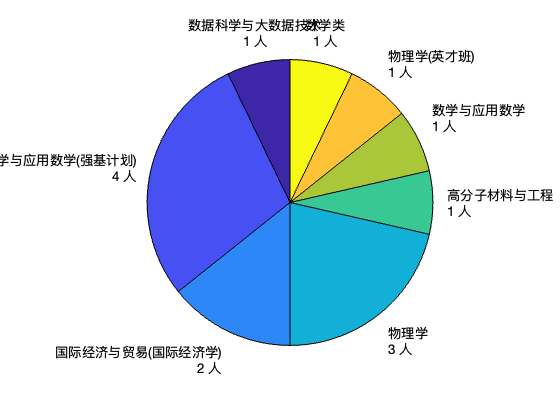

In [15]:
for idx = 1:length(majors_num)
    labels{idx} = sprintf('%s\n%d 人', majors_tuple_only{idx}, majors_num(idx));
end
figure;
pie(majors_num, labels);